In [271]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('/Users/stanislavyatsevich/Desktop/Salary.csv')
data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior
0,32.0,Male,1,Software Engineer,5.0,90000.0,UK,White,0
1,28.0,Female,2,Data Analyst,3.0,65000.0,USA,Hispanic,0
2,45.0,Male,3,Manager,15.0,150000.0,Canada,White,1
3,36.0,Female,1,Sales Associate,7.0,60000.0,USA,Hispanic,0
4,52.0,Male,2,Director,20.0,200000.0,USA,Asian,0


In [272]:
data.shape

(6684, 9)

In [273]:
data.isna().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
Country                0
Race                   0
Senior                 0
dtype: int64

In [274]:
data1 = data.copy()
data1.describe()

,Age,Education Level,Years of Experience,Salary,Senior
count,6684.000000,6684.000000,6684.000000,6684.000000,6684.000000
mean,33.610563,1.622382,8.077723,115307.175194,0.143477
std,7.595994,0.880474,6.029305,52806.810881,0.350585
min,21.000000,0.000000,0.000000,350.000000,0.000000
25%,28.000000,1.000000,3.000000,70000.000000,0.000000
50%,32.000000,1.000000,7.000000,115000.000000,0.000000
75%,38.000000,2.000000,12.000000,160000.000000,0.000000
max,62.000000,3.000000,34.000000,250000.000000,1.000000


In [275]:
data1.duplicated().sum()

1536

In [276]:
data1.drop_duplicates(inplace=True)
data1.shape

(5148, 9)

In [277]:
for column in data1:
    print(f"{column} - {len(data1[column].unique())} : {data1[column].unique()}")

Age - 41 : [32. 28. 45. 36. 52. 29. 42. 31. 26. 38. 48. 35. 40. 27. 44. 33. 39. 25.
 51. 34. 47. 30. 41. 37. 24. 43. 50. 46. 49. 23. 53. 61. 57. 62. 55. 56.
 54. 60. 58. 22. 21.]
Gender - 2 : ['Male' 'Female']
Education Level - 4 : [1 2 3 0]
Job Title - 129 : ['Software Engineer' 'Data Analyst' 'Manager' 'Sales Associate' 'Director'
 'Marketing Analyst' 'Product Manager' 'Sales Manager'
 'Marketing Coordinator' 'Scientist' 'Software Developer' 'HR Manager'
 'Financial Analyst' 'Project Manager' 'Customer Service Rep'
 'Operations Manager' 'Marketing Manager' 'Engineer' 'Data Entry Clerk'
 'Sales Director' 'Business Analyst' 'VP of Operations' 'IT Support'
 'Recruiter' 'Financial Manager' 'Social Media Specialist'
 'Software Manager' 'Developer' 'Consultant' 'Product Designer' 'CEO'
 'Accountant' 'Data Scientist' 'Marketing Specialist' 'Technical Writer'
 'HR Generalist' 'Project Engineer' 'Customer Success Rep'
 'Sales Executive' 'UX Designer' 'Operations Director' 'Network Engineer'
 

Text(0.5, 1.0, 'Distributions')

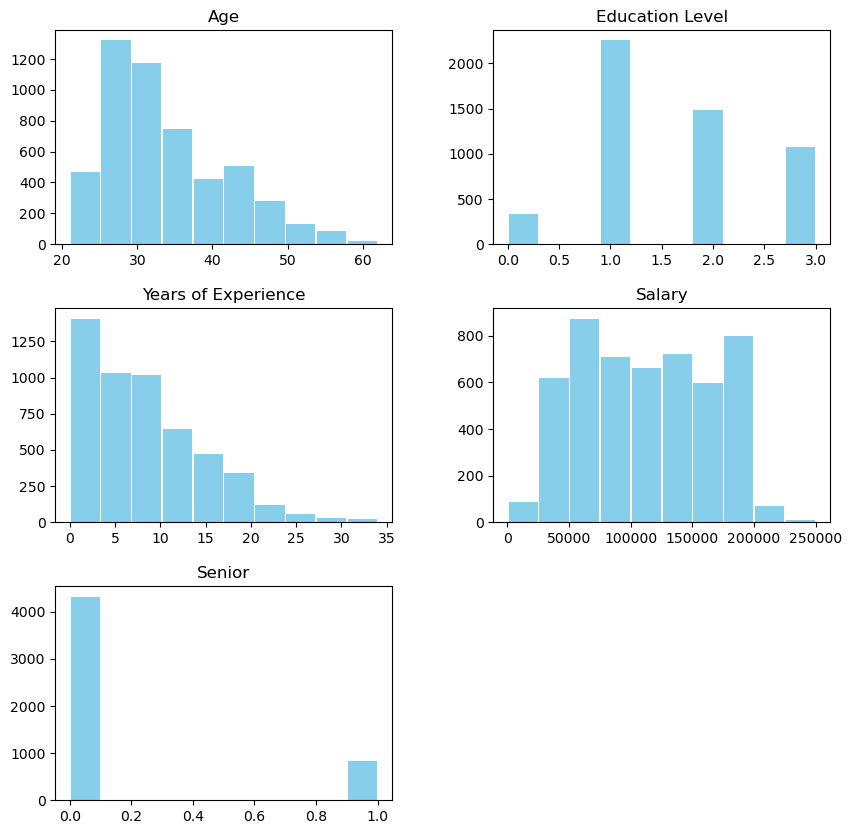

In [278]:
data1.hist(figsize=(10, 10), rwidth = 0.95, color = "skyblue", grid = False)
plt.title("Distributions")

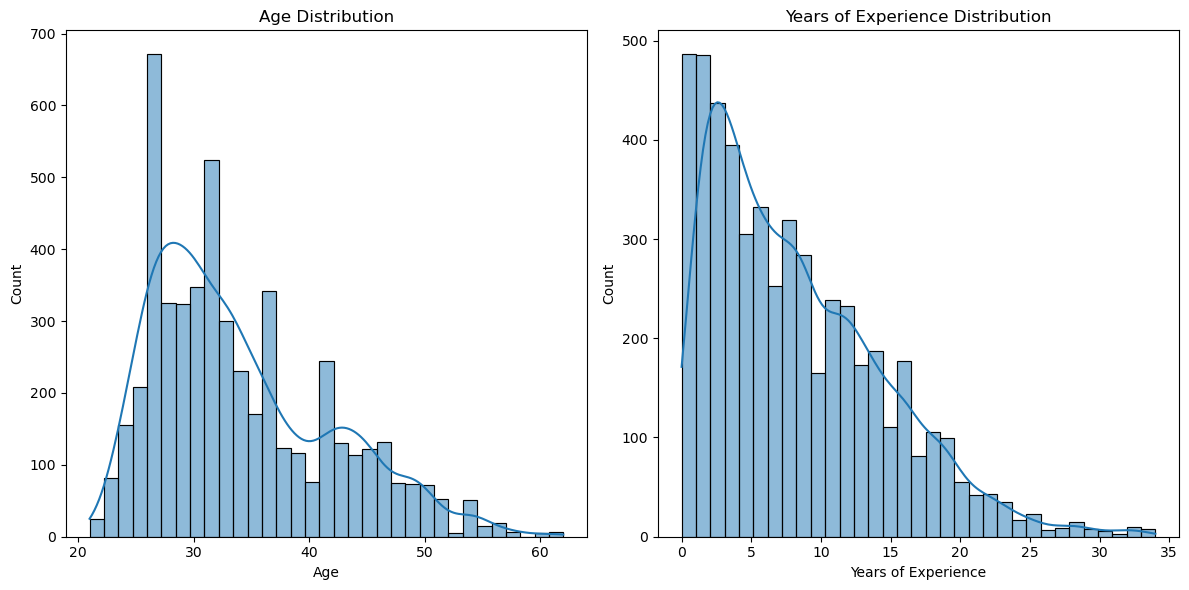

In [279]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(data1["Age"], kde=True, ax=axs[0])
axs[0].set_title("Age Distribution")

sns.histplot(data1["Years of Experience"], kde=True, ax=axs[1])
axs[1].set_title("Years of Experience Distribution")
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Gender distribution')

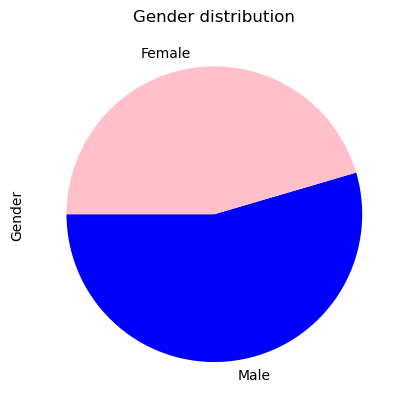

In [280]:
data1['Gender'].value_counts().plot(kind='pie', colors=['blue', 'pink'], labels=['Male', 'Female'], startangle=180)
plt.title('Gender distribution')

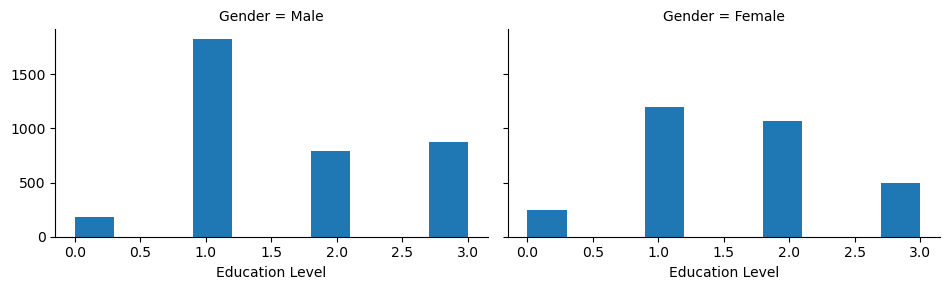

In [281]:
GenderToEducation = sns.FacetGrid(data, col='Gender', aspect=1.6)
GenderToEducation.map(plt.hist, 'Education Level')

Text(0.5, 1.0, 'Salary-Age dependence')

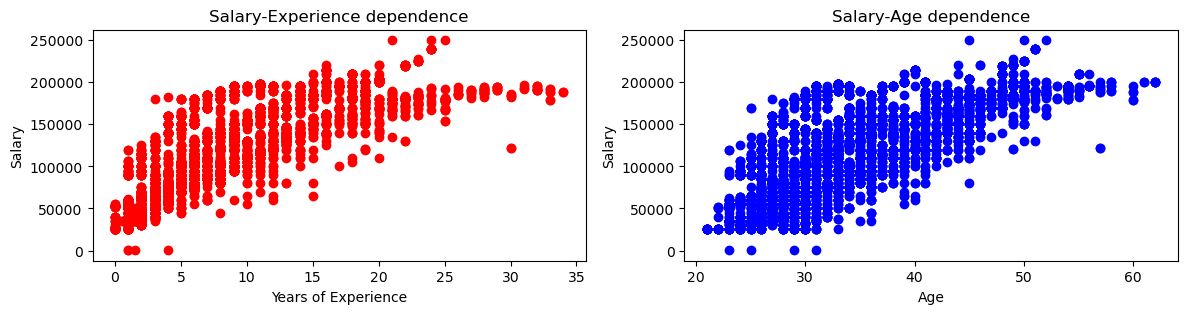

In [282]:
fig, axs = plt.subplots(1, 2, figsize=(14, 3))
axs[0].scatter(data1['Years of Experience'], data1['Salary'], color = 'red')
axs[0].set_xlabel('Years of Experience')
axs[0].set_ylabel('Salary')
axs[0].set_title('Salary-Experience dependence')

axs[1].scatter(data1['Age'], data1['Salary'], color = 'blue')
axs[1].set_xlabel('Age')
axs[1].set_ylabel('Salary')
axs[1].set_title('Salary-Age dependence')

Text(0.5, 1.0, 'Salary-Gender dependence')

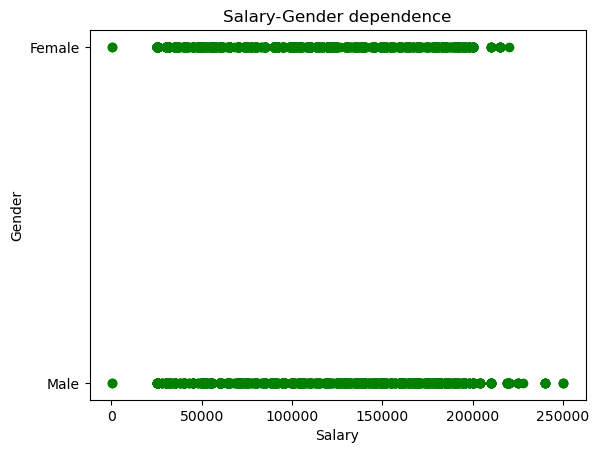

In [283]:
plt.scatter(data1['Salary'], data1['Gender'], color='green')
plt.xlabel('Salary')
plt.ylabel('Gender')
plt.title('Salary-Gender dependence')

In [284]:
data1[['Salary', 'Gender']].groupby(['Gender']).mean().sort_values(by='Salary', ascending=False)

,Salary
Gender,
Male,120483.631410
Female,106818.066239


In [285]:
data1[['Salary', 'Race']].groupby(['Race']).mean().sort_values(by='Salary', ascending=False)

,Salary
Race,
Black,118190.993902
Korean,117331.864307
White,115249.142668
Mixed,114959.796935
Asian,114147.919052
Australian,113187.128492
Chinese,112469.891566
African American,111788.699248
Welsh,110802.622642


In [286]:
data1[['Salary', 'Senior']].groupby(['Senior']).mean().sort_values(by='Salary', ascending=False)

,Salary
Senior,
1,142449.684848
0,108894.592181


In [287]:
data1[['Salary', 'Country']].groupby(['Country']).mean().sort_values(by='Salary', ascending=False)

,Salary
Country,
Canada,115716.535497
China,115513.882061
UK,114553.724432
Australia,114177.376102
USA,111597.088290


Text(0.5, 1.0, 'Salary-Education dependence')

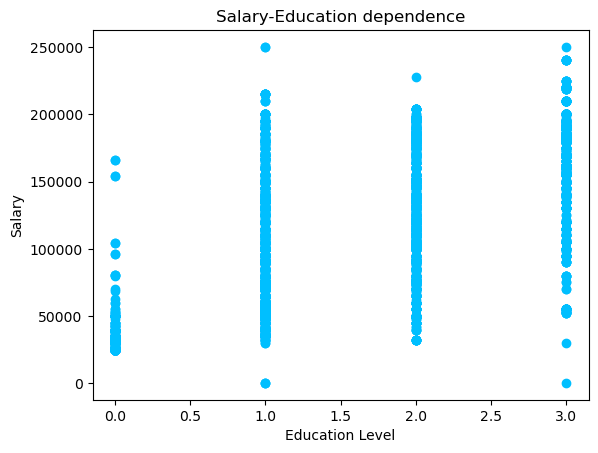

In [288]:
plt.scatter(data1['Education Level'], data1['Salary'], color='deepskyblue')
plt.xlabel('Education Level')
plt.ylabel('Salary')
plt.title('Salary-Education dependence')

In [289]:
data1[['Salary', 'Education Level']].groupby(['Education Level']).mean().sort_values(by='Salary', ascending=False)

,Salary
Education Level,
3,163696.902507
2,128304.246455
1,93105.807453
0,35987.110119


In [290]:
data1 = pd.get_dummies(data1, columns = ['Gender', 'Education Level', 'Job Title', 'Country', 'Race'])
data1.head()

,Age,Years of Experience,Salary,Senior,Gender_Female,Gender_Male,Education Level_0,Education Level_1,Education Level_2,Education Level_3,...,Race_African American,Race_Asian,Race_Australian,Race_Black,Race_Chinese,Race_Hispanic,Race_Korean,Race_Mixed,Race_Welsh,Race_White
0,32.0,5.0,90000.0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,28.0,3.0,65000.0,0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,45.0,15.0,150000.0,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,36.0,7.0,60000.0,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,52.0,20.0,200000.0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [291]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = data1.drop(['Salary'], axis=1)
y = data1['Salary']
X_origin = X
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [292]:
from sklearn.linear_model import LinearRegression
LinearRegressor = LinearRegression()
LinearRegressor.fit(X_train, y_train)
print('Train Error : ', LinearRegressor.score(X_train, y_train)) 
print('Test Error : ', LinearRegressor.score(X_test, y_test))
print('Here we have overfitting')

Train Error :  0.8323177439274483
Test Error :  -1360843034543620.8
Here we have overfitting


In [293]:
from sklearn.linear_model import Ridge
L2_model = Ridge()
L2_model.fit(X_train, y_train)
print('Train Error : ', L2_model.score(X_train, y_train)) 
print('Test Error : ', L2_model.score(X_test, y_test))
print('Now much better :D')

Train Error :  0.8312210079100169
Test Error :  0.8209622823088252
Now much better :D


In [294]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

DecisionTreeRegr = DecisionTreeRegressor()
DecisionTreeRegr.fit(X_train, y_train)
print('Train Error : ', DecisionTreeRegr.score(X_train, y_train)) 
print('Test Error : ', DecisionTreeRegr.score(X_test, y_test))

Train Error :  0.9975554079138069
Test Error :  0.9499275853959835


In [295]:
RandomForestRegr = RandomForestRegressor(max_depth=23, n_estimators=100, random_state=42)
RandomForestRegr.fit(X_train, y_train)
print('Train Error : ', RandomForestRegr.score(X_train, y_train)) 
print('Test Error : ', RandomForestRegr.score(X_test, y_test))

Train Error :  0.993090004224528
Test Error :  0.9650458284063568


In [296]:
KNeighborsRegr = KNeighborsRegressor()
KNeighborsRegr.fit(X_train, y_train)
print('Train Error : ', KNeighborsRegr.score(X_train, y_train)) 
print('Test Error : ', KNeighborsRegr.score(X_test, y_test))

Train Error :  0.9402677554439351
Test Error :  0.8948356929786632


In [297]:
from sklearn.ensemble import BaggingRegressor
BaggingRegr = BaggingRegressor(DecisionTreeRegressor(), n_estimators=100, random_state=42)
BaggingRegr.fit(X_train, y_train)
print('Train Error : ', BaggingRegr.score(X_train, y_train)) 
print('Test Error : ', BaggingRegr.score(X_test, y_test))

Train Error :  0.9931524180691037
Test Error :  0.9647685019440237


In [298]:
from sklearn.ensemble import GradientBoostingRegressor
GradBoostRegr = GradientBoostingRegressor(max_depth=2, n_estimators=2500, random_state=42, learning_rate=1.2)
GradBoostRegr.fit(X_train, y_train)
print('Train Error : ', GradBoostRegr.score(X_train, y_train)) 
print('Test Error : ', GradBoostRegr.score(X_test, y_test))

Train Error :  0.9832698449337676
Test Error :  0.9582152778933974


In [299]:
print('MSE for Random Forest : ', mean_squared_error(y_test, RandomForestRegr.predict(X_test)))
print('MAE for Random Forest : ', mean_absolute_error(y_test, RandomForestRegr.predict(X_test)))
print()
print('MSE for Bagging : ', mean_squared_error(y_test, BaggingRegr.predict(X_test)))
print('MAE for Bagging : ', mean_absolute_error(y_test, BaggingRegr.predict(X_test)))
print()
print('MSE for Grad Boosting : ', mean_squared_error(y_test, GradBoostRegr.predict(X_test)))
print('MAE for Grad Boosting : ', mean_absolute_error(y_test, GradBoostRegr.predict(X_test)))

MSE for Random Forest :  92370027.4050859
MAE for Random Forest :  4746.963871667937

MSE for Bagging :  93102891.37404664
MAE for Bagging :  4770.371585829866

MSE for Grad Boosting :  110420466.28856987
MAE for Grad Boosting :  6395.82588080884
